/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Logistic Regression Accuracy: 0.9179734620024126
              precision    recall  f1-score   support

           0       0.90      0.89      0.90       337
           1       0.93      0.93      0.93       492

    accuracy                           0.92       829
   macro avg       0.92      0.91      0.91       829
weighted avg       0.92      0.92      0.92       829

Decision Tree Accuracy: 0.9493365500603136
              precision    recall  f1-score   support

           0       1.00      0.88      0.93       337
           1       0.92      1.00      0.96       492

    accuracy                           0.95       829
   macro avg       0.96      0.94      0.95       829
weighted avg       0.95      0.95      0.95       829

Random Forest Accuracy: 0.97708082026538
              precision    recall  f1-score   support

           0       1.00      0.94      0.97       337
           1       0.96      1.00      0.98       492

    accuracy                           0.98      

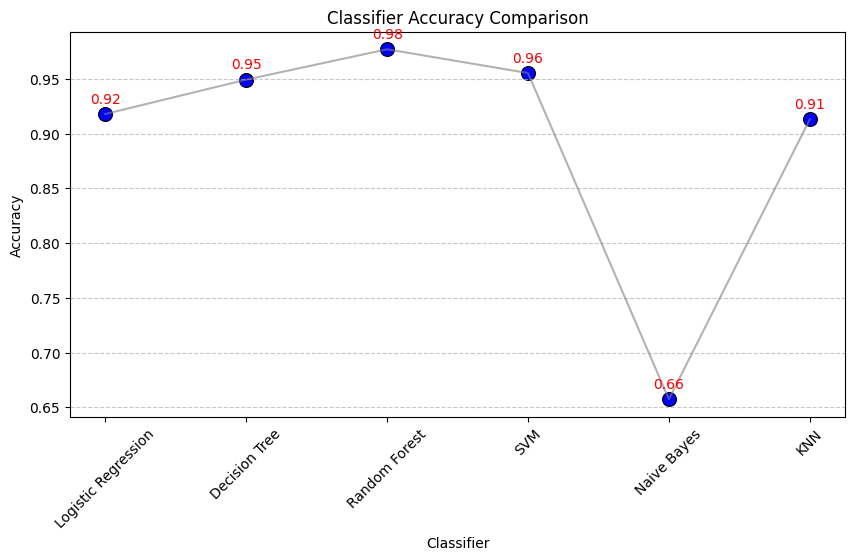

In [4]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import os
from PIL import Image
from sklearn.preprocessing import LabelEncoder, StandardScaler
from PIL import ImageFile
ImageFile.LOAD_TRUNCATED_IMAGES = True
from sklearn.utils import Bunch
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_fractured_dir = 'train/fractured'
train_not_fractured_dir = 'train/not fractured'
test_fractured_dir = 'test/fractured'
test_not_fractured_dir = 'test/not fractured'
val_fractured_dir = 'val/fractured'
val_not_fractured_dir = 'val/not fractured'

# Function to load images from a directory
def load_image_files(fractured_dir, not_fractured_dir, dimension=(64, 64)):
    categories = ['fractured', 'not fractured']
    descr = "A dataset of images"
    images = []
    flat_data = []
    target = []
    
    for label, direc in enumerate([fractured_dir, not_fractured_dir]):
        for file in sorted(os.listdir(direc)):
            img = Image.open(os.path.join(direc, file))
            img = img.resize(dimension)
            img = np.array(img)
            if img.shape != dimension:
                img = np.resize(img, dimension)
            img = img.flatten()
            flat_data.append(img)
            images.append(img)
            target.append(label)
    
    flat_data = np.array(flat_data)
    target = np.array(target)
    images = np.array(images)

    return Bunch(data=flat_data,
                 target=target,
                 target_names=categories,
                 images=images,
                 DESCR=descr)

# Load the dataset
train_data = load_image_files(train_fractured_dir, train_not_fractured_dir)
test_data = load_image_files(test_fractured_dir, test_not_fractured_dir)
val_data = load_image_files(val_fractured_dir, val_not_fractured_dir)

# Normalize the data
scaler = StandardScaler()
X_train = scaler.fit_transform(train_data.data)
X_val = scaler.transform(val_data.data)

# Encode the labels
le = LabelEncoder()
y_train = le.fit_transform(train_data.target)
y_val = le.transform(val_data.target)

# Data augmentation
datagen = ImageDataGenerator(
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    horizontal_flip=True
)

# Initialize classifiers
classifiers = {
    'Logistic Regression': LogisticRegression(max_iter=1000),
    'Decision Tree': DecisionTreeClassifier(),
    'Random Forest': RandomForestClassifier(),
    'SVM': SVC(),
    'Naive Bayes': GaussianNB(),
    'KNN': KNeighborsClassifier()
}

# Train and evaluate classifiers
results = {}
for name, clf in classifiers.items():
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_val)
    accuracy = accuracy_score(y_val, y_pred)
    results[name] = accuracy
    print(f'{name} Accuracy: {accuracy}')
    print(classification_report(y_val, y_pred))

# Plot the results
plt.figure(figsize=(10, 5))

# Scatter plot
sns.scatterplot(x=list(results.keys()), y=list(results.values()), s=100, color='blue', marker='o', edgecolor='black')

# Connecting points with lines
plt.plot(list(results.keys()), list(results.values()), linestyle='-', color='gray', alpha=0.6)

# Print values next to dots
for i, (key, value) in enumerate(results.items()):
    plt.text(i, value + 0.01, f'{value:.2f}', ha='center', fontsize=10, color='red')  # Pozisyon ve görünüm ayarları

plt.xlabel('Classifier')
plt.ylabel('Accuracy')
plt.title('Classifier Accuracy Comparison')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()